## Generative Adversarial Nets (2014)
- The Vanilla GAN

## Features
- only use FC Layers
- Binary Cross Entropy
- ReLU activation function for Generator
- ReLU + Dropout for Discriminator

## Dataset
- Fashion MNist

## Import Modules

In [1]:
import sys
sys.path.insert(0, '../')

import os
import cv2
import tqdm
import random

import numpy as np

import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

from torchvision.datasets import FashionMNIST

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

from utils import imshow, get_mean

random_seed = 123

torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Download Fashion MNist
- We don't validate or test here.

In [2]:
os.makedirs('../dataset', exist_ok=True)

train_data = FashionMNIST('../dataset', train=True, download=True)
#test_data = FashionMNIST('../dataset', train=False, download=True)

In [3]:
classes = train_data.classes
train_images, train_labels = train_data.data, train_data.targets
#test_images, test_labels = test_data.data, test_data.targets

print(f"{len(train_images)} train images...")
#print(f"{len(test_images)} test images...")

60000 train images...


<Figure size 864x288 with 0 Axes>

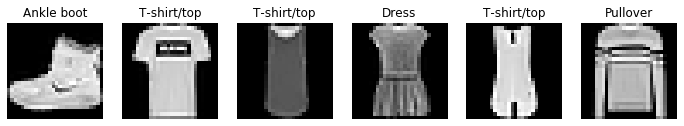

In [4]:
imshow(train_images[:6], train_labels[:6], classes)

## Build Network

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(100, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.model(x)
        return x

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.model(x)
        return x

In [10]:
G = Generator().to(device)
D = Discriminator().to(device)

## Sampling function

In [11]:
def sample_z(num=1, dim=100):
    return torch.randn(num, dim)

<Figure size 864x288 with 0 Axes>

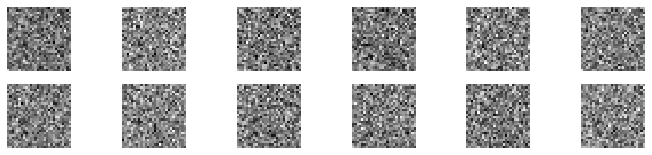

In [12]:
fake = G(sample_z(12, 100).to(device))
imshow(fake.detach().cpu().reshape(-1, 28, 28))

## Hyperparameters

In [13]:
batch_size    = 16
learning_rate = 0.001
epochs        = 20

## Optimizer

In [14]:
optim_D = optim.Adam(D.parameters(), learning_rate)
optim_G = optim.Adam(G.parameters(), learning_rate)

## Loss Function

In [15]:
bce = F.binary_cross_entropy
ones = torch.ones(batch_size, 1).to(device)
zeros = torch.zeros(batch_size, 1).to(device)

def loss_fn_D(D, G, real, fake):
    return bce(D(real), ones) + bce(D(fake), zeros)

def loss_fn_G(D, G, fake):
    return bce(D(fake), ones)

## Build CustomDataset and Dataloader

In [16]:
class CustomDataset(Dataset):
    def __init__(self):
        super(CustomDataset).__init__()
        
        self.xs = train_images * (2 / 255) - 1.
        print(f"normalized [{self.xs.min()}, {self.xs.max()}]")
    
    def __len__(self):
        return len(self.xs)
    
    def __getitem__(self, idx):
        x = self.xs[idx]
        return x.view(-1)

In [17]:
dataloader_params = {'batch_size': batch_size,
                     'shuffle': True,
                     'drop_last': True,
                     'num_workers': 0}

train_ds = CustomDataset()
train_gen = DataLoader(train_ds, **dataloader_params)

normalized [-1.0, 1.0]


## Training

Epoch 0/20 G_loss : 2.768379 D_loss : 0.672744: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

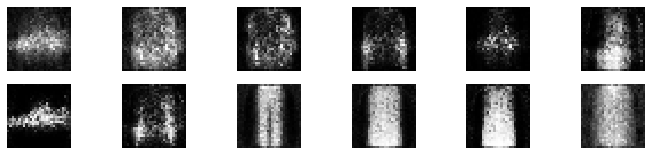

Epoch 1/20 G_loss : 1.286360 D_loss : 1.071976: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

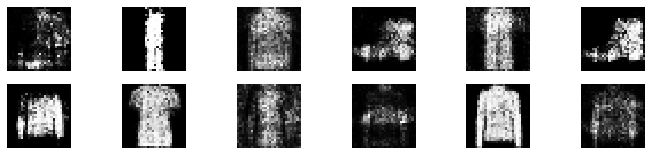

Epoch 2/20 G_loss : 1.038379 D_loss : 1.220521: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

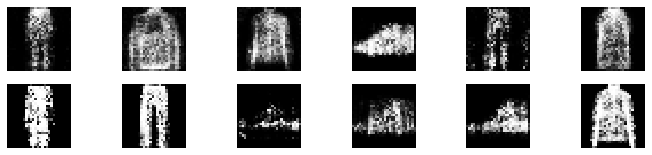

Epoch 3/20 G_loss : 0.965006 D_loss : 1.269839: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

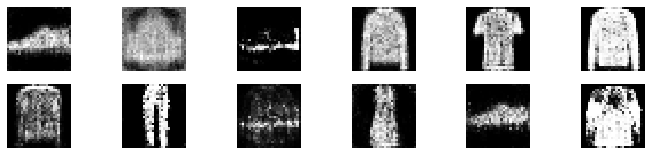

Epoch 4/20 G_loss : 0.910045 D_loss : 1.285900: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

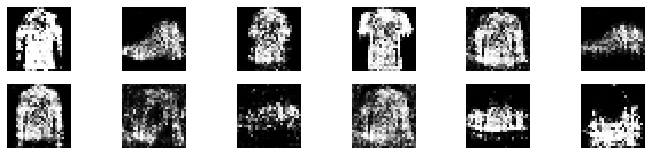

Epoch 5/20 G_loss : 0.922339 D_loss : 1.268018: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

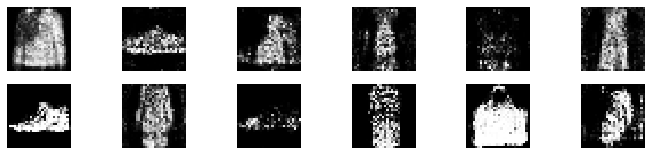

Epoch 6/20 G_loss : 0.944607 D_loss : 1.253773: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

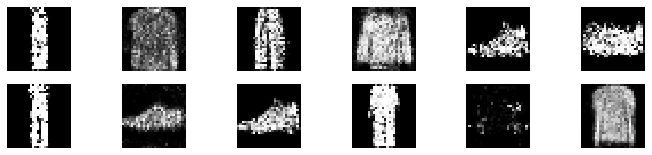

Epoch 7/20 G_loss : 0.961640 D_loss : 1.233948: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

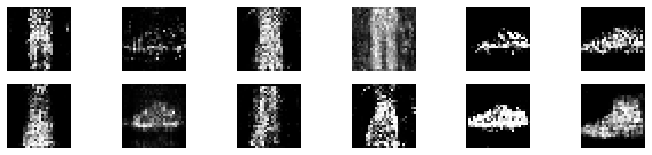

Epoch 8/20 G_loss : 0.971777 D_loss : 1.227914: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

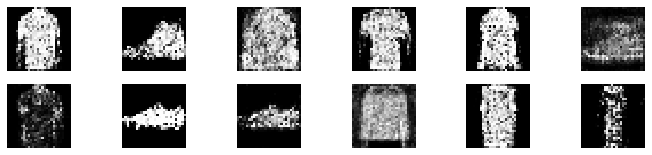

Epoch 9/20 G_loss : 0.986005 D_loss : 1.217631: 100%|█| 3750/3750 [00:2


<Figure size 864x288 with 0 Axes>

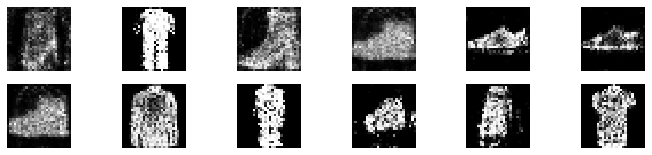

Epoch 10/20 G_loss : 1.011362 D_loss : 1.200701: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

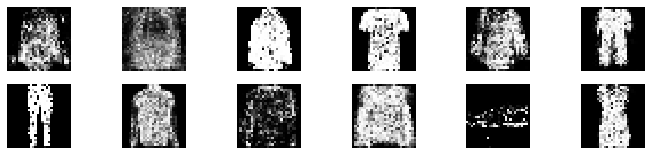

Epoch 11/20 G_loss : 1.045243 D_loss : 1.177754: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

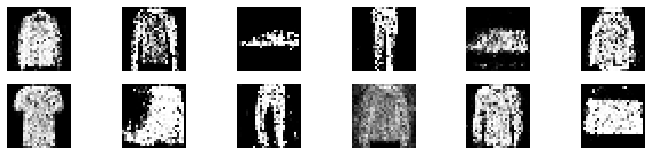

Epoch 12/20 G_loss : 1.051368 D_loss : 1.172222: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

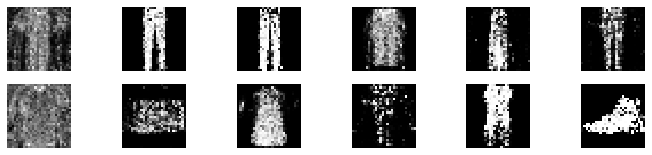

Epoch 13/20 G_loss : 1.067122 D_loss : 1.163653: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

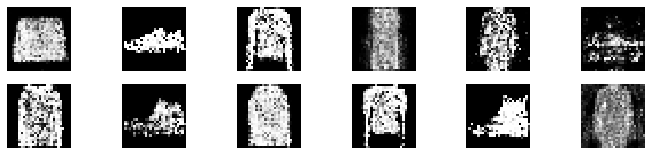

Epoch 14/20 G_loss : 1.088514 D_loss : 1.146647: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

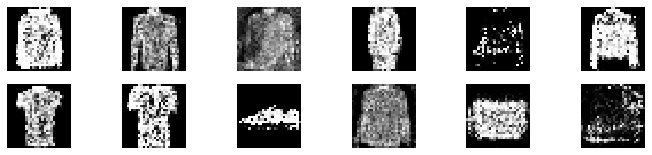

Epoch 15/20 G_loss : 1.126071 D_loss : 1.126688: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

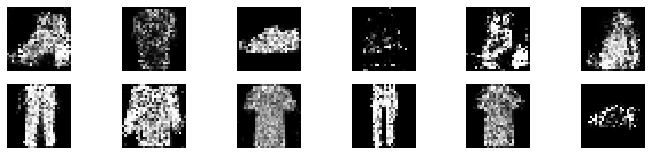

Epoch 16/20 G_loss : 1.183734 D_loss : 1.093058: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

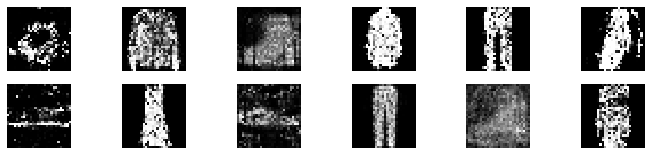

Epoch 17/20 G_loss : 1.237459 D_loss : 1.063958: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

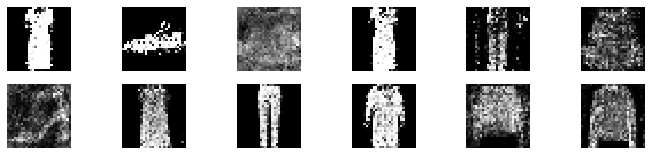

Epoch 18/20 G_loss : 1.235251 D_loss : 1.070398: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

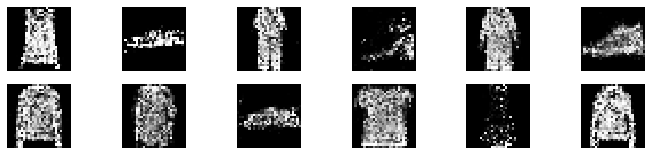

Epoch 19/20 G_loss : 1.233765 D_loss : 1.067237: 100%|█| 3750/3750 [00:


<Figure size 864x288 with 0 Axes>

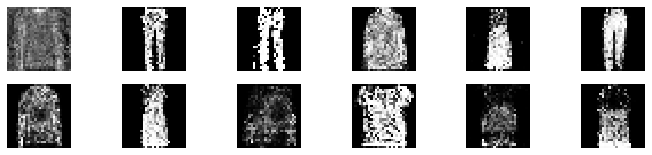

In [19]:
for epoch in range(epochs):
    d_losses = []
    g_losses = []
    
    D.train()
    G.train()
    
    pgbar = tqdm.tqdm(train_gen, total=len(train_gen))
    for real in pgbar:
        
        # train Discriminator
        real = real.to(device)
        z    = sample_z(batch_size).to(device)
        
        fake = G(z)
        
        optim_D.zero_grad()
        d_loss = loss_fn_D(D, G, real, fake)
        d_loss.backward()
        optim_D.step()
    
        # train Generator
        z    = sample_z(batch_size).to(device)
        
        fake = G(z)
        
        optim_G.zero_grad()
        g_loss = loss_fn_G(D, G, fake)
        g_loss.backward()
        optim_G.step()
        
        # print
        d_losses.append(d_loss.detach().cpu().numpy())
        g_losses.append(g_loss.detach().cpu().numpy())
        
        pgbar.set_description(f"Epoch {epoch}/{epochs} G_loss : {get_mean(g_losses):.6f} D_loss : {get_mean(d_losses):.6f}")

    # visualize
    D.eval()
    G.eval()
    
    z = sample_z(12).to(device)
    fake = G(z)
    
    imshow(fake.detach().cpu().numpy().reshape(-1, 28, 28))